Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0000
N =  70
time 100000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0001
N =  70
time 200000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0002
N =  70
time 300000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0003
N =  70
time 400000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0004
N =  70
time 500000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0005
N =  

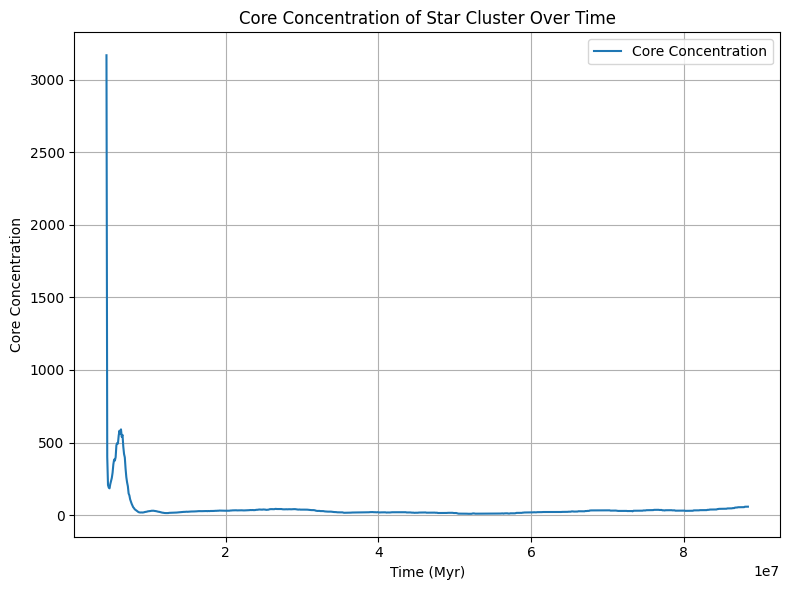

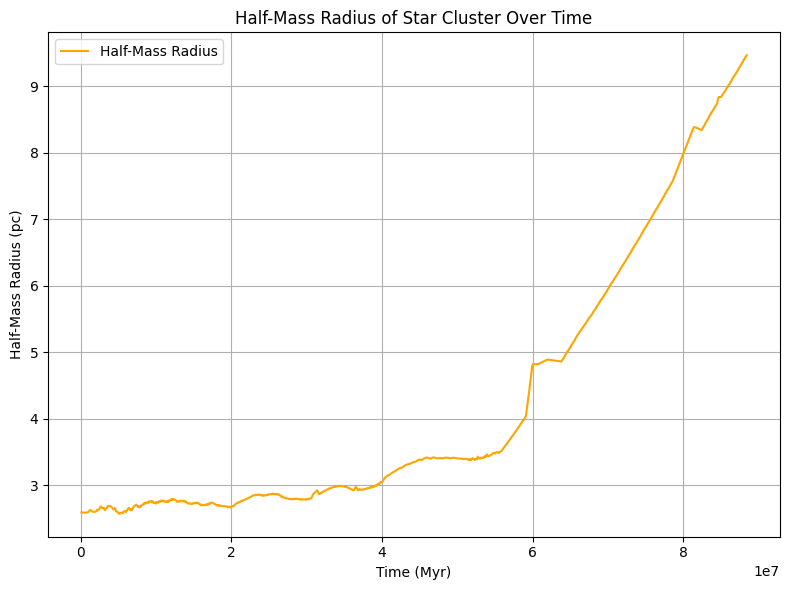

Core Concentrations: [None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None 3169.2043176404864 399.45328435654795 206.81848295365407
 189.38390517204425 184.2858368604869 213.67775607847486
 236.28674993187454 256.47903541965235 292.01507229214906
 349.2033062056822 382.526520010024 375.33923969599937 399.01960259266735
 481.7902117907483 496.379426315518 492.81198191349114 547.7792590717919
 581.7788179722188 558.1587374314447 590.6160079986272 539.2806592081768
 552.6057579999198 472.66207304160974 421.3698818664585 397.29811188034864
 320.1510364206505 261.3156605501557 224.93227393109962 198.73943216289618
 148.99746446927247 135.68028135077648 108.17972251774471 91.6478644537107
 77.61559161679737 65.52128650650978 54.109678521731865 48.19133697628467
 40.01644739229753 35.89691985849706 31.029378132412514 27.5388335646

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from nbd_utils_code import nbd_read  

# Directory containing simulation snapshot data
snapshot_directory = r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir'

# List of snapshot files sorted by time
snapshot_files = sorted([f for f in os.listdir(snapshot_directory) if f.startswith('cluster')])

# Arrays to hold time and mass data
times = []
distances_over_time = []

# Read the simulation data from snapshot files
for snapshot_file in snapshot_files:
    filepath = os.path.join(snapshot_directory, snapshot_file)
    data = nbd_read(filepath)

    times.append(data.time)
    x, y, z = data.x, data.y, data.z
    m = data.mass
    
    # Calculate the distance from the center of the cluster
    distances = np.sqrt(x**2 + y**2 + z**2)
    distances_over_time.append(distances)

# Convert times and distances to numpy arrays for easier processing
times = np.array(times)
distances_over_time = np.array(distances_over_time)

# Function to compute the density profile
def density_profile(r, a, b):
    return a / (r + b)**2

# Calculate the density profile
def calculate_density_profile(distances):
    hist, bin_edges = np.histogram(distances, bins=30, density=True)
    centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    return centers, hist

# Fit the density profile
def fit_density_profile(centers, density):
    try:
        popt, _ = curve_fit(density_profile, centers, density, p0=(1, 1))
        return popt
    except RuntimeError as e:
        print(f"Error fitting density profile: {e}")
        return None

# Function to calculate core concentration from fitted density profile
def core_concentration(distances):
    centers, density = calculate_density_profile(distances)
    params = fit_density_profile(centers, density)
    if params is not None:
        return params[0]  # Returning the parameter a from the fit
    return None

# Function to calculate half-mass radius
def calculate_half_mass_radius(masses, positions):
    total_mass = np.sum(masses)
    sorted_indices = np.argsort(positions)
    cumulative_mass = np.cumsum(masses[sorted_indices])
    half_mass_radius = positions[sorted_indices][np.searchsorted(cumulative_mass, total_mass / 2)]
    return half_mass_radius

# Calculate core concentration and half-mass radius for each snapshot
core_concentrations = []
half_mass_radii = []

for snapshot_file in snapshot_files:
    filepath = os.path.join(snapshot_directory, snapshot_file)
    data = nbd_read(filepath)

    masses = data.mass
    x, y, z = data.x, data.y, data.z
    positions = np.sqrt(x**2 + y**2 + z**2)

    # Calculate core concentration and half-mass radius
    distances = np.sqrt(data.x**2 + data.y**2 + data.z**2)
    concentration = core_concentration(distances)
    half_mass_radius = calculate_half_mass_radius(masses, positions)

    core_concentrations.append(concentration)
    half_mass_radii.append(half_mass_radius)

# Convert core concentrations and half-mass radii to numpy arrays
core_concentrations = np.array(core_concentrations)
half_mass_radii = np.array(half_mass_radii)

# Plotting core concentrations separately
plt.figure(figsize=(8, 6))
plt.plot(times, core_concentrations, label='Core Concentration')
plt.xlabel('Time (Myr)')
plt.ylabel('Core Concentration')
plt.title('Core Concentration of Star Cluster Over Time')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Plotting half-mass radii separately
plt.figure(figsize=(8, 6))
plt.plot(times, half_mass_radii, color='orange', label='Half-Mass Radius')
plt.xlabel('Time (Myr)')
plt.ylabel('Half-Mass Radius (pc)')
plt.title('Half-Mass Radius of Star Cluster Over Time')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Example output
print("Core Concentrations:", core_concentrations)
print("Half-Mass Radii:", half_mass_radii)


Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_152Mev_1.5vir\cluster0000
N =  70
time 500000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_152Mev_1.5vir\cluster0001
N =  70
time 1000000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_152Mev_1.5vir\cluster0002
N =  70
time 1500000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_152Mev_1.5vir\cluster0003
N =  70
time 2000000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_152Mev_1.5vir\cluster0004
N =  70
time 2500000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_152Mev_1.5vir\cluster

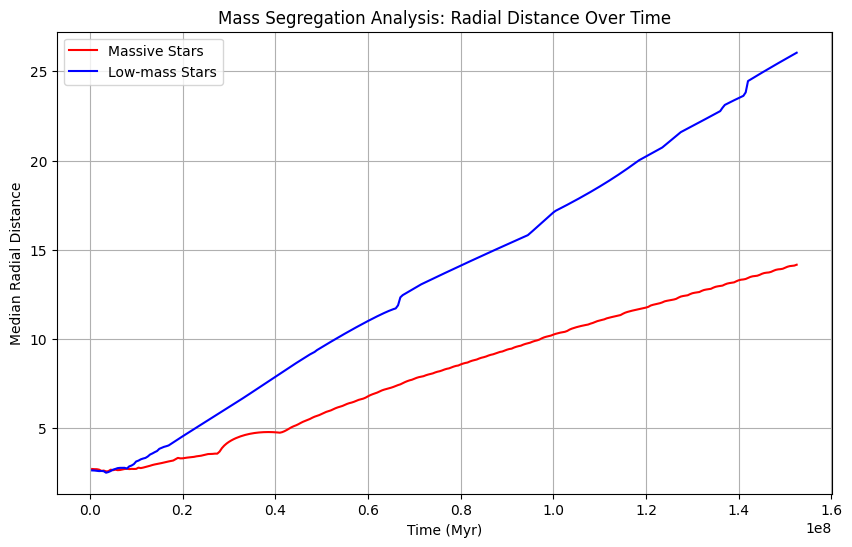

In [20]:
import os
import numpy as np
from nbd_utils_code import nbd_read

# Define your snapshot directory
snapshot_directory = r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_152Mev_1.5vir'
snapshot_files = sorted([f for f in os.listdir(snapshot_directory) if f.startswith('cluster')])

# To store time, and distances for later analysis
times = []
massive_distances = []
low_mass_distances = []

# Mass threshold to differentiate between 'massive' and 'low-mass' stars
mass_threshold = 0.6170  # You can adjust this value based on the distribution in your data

# Process each snapshot
for snapshot_file in snapshot_files:
    filepath = os.path.join(snapshot_directory, snapshot_file)
    data = nbd_read(filepath)

    times.append(data.time)

    x, y, z = data.x, data.y, data.z
    masses = data.mass

    # Calculate radial distance from origin (or you can calculate from the center of mass)
    distances = np.sqrt(x**2 + y**2 + z**2)

    # Separate stars into massive and low-mass groups
    massive_star_distances = distances[masses > mass_threshold]
    low_mass_star_distances = distances[masses <= mass_threshold]

    # Store the mean/median distance of both groups at this time step
    massive_distances.append(np.median(massive_star_distances))  # You can use mean() or median()
    low_mass_distances.append(np.median(low_mass_star_distances))

# Now we have `times`, `massive_distances`, and `low_mass_distances`
# You can visualize how mass segregation evolves over time

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(times, massive_distances, label='Massive Stars', color='red')
plt.plot(times, low_mass_distances, label='Low-mass Stars', color='blue')
plt.xlabel('Time (Myr)')
plt.ylabel('Median Radial Distance')
plt.title('Mass Segregation Analysis: Radial Distance Over Time')
plt.legend()
plt.grid(True)
plt.show()


Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0000
N =  70
time 100000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0001
N =  70
time 200000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0002
N =  70
time 300000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0003
N =  70
time 400000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0004
N =  70
time 500000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0005
N =  

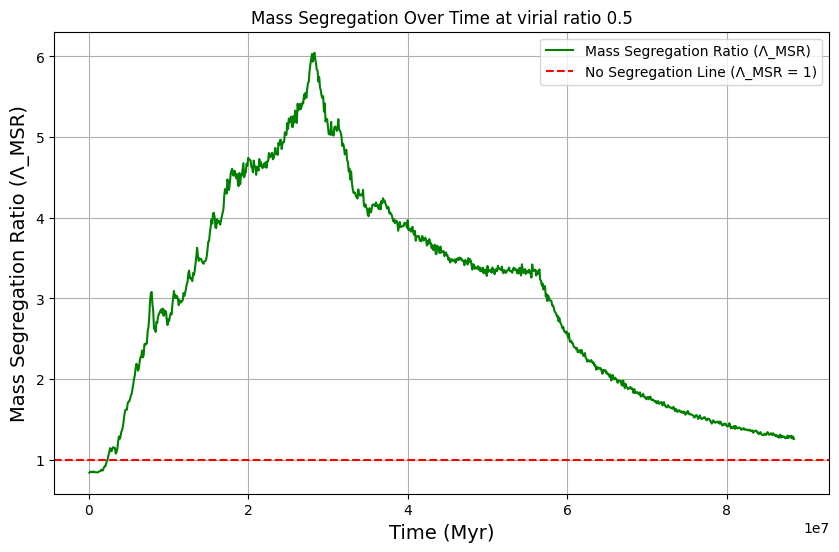

In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt
from nbd_utils_code import nbd_read
from scipy.spatial import cKDTree
from scipy.sparse.csgraph import minimum_spanning_tree

# Define your snapshot directory
snapshot_directory = r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir'
snapshot_files = sorted([f for f in os.listdir(snapshot_directory) if f.startswith('cluster')])

# To store time and MST mass segregation ratios over time
times = []
mass_segregation_ratios = []

# Mass threshold to differentiate between 'massive' and 'low-mass' stars
mass_threshold = 0.6170320451257751  # You can adjust this value

# Number of random trials for the MST comparison
num_trials = 1000

def calculate_mst_length(positions):
    """Calculate the MST length for a given set of star positions."""
    tree = cKDTree(positions)
    distance_matrix = tree.sparse_distance_matrix(tree, np.inf)
    mst = minimum_spanning_tree(distance_matrix)
    mst_length = mst.sum()
    return mst_length

# Process each snapshot
for snapshot_file in snapshot_files:
    filepath = os.path.join(snapshot_directory, snapshot_file)
    data = nbd_read(filepath)

    times.append(data.time)

    # Get star positions and masses
    positions = np.vstack([data.x, data.y, data.z]).T
    masses = data.mass

    # Select massive stars and their positions
    massive_star_positions = positions[masses > mass_threshold]

    # Compute MST length for massive stars
    mst_massive = calculate_mst_length(massive_star_positions)

    # Perform random trials for MST of random subsets of the same size
    all_mst_lengths = []
    num_massive_stars = len(massive_star_positions)
    
    for _ in range(num_trials):
        random_subset = positions[np.random.choice(len(positions), num_massive_stars, replace=False)]
        mst_random = calculate_mst_length(random_subset)
        all_mst_lengths.append(mst_random)

    # Compute the average MST length for random subsets
    mean_mst_random = np.mean(all_mst_lengths)

    # Mass Segregation Ratio (Λ_MSR)
    mass_segregation_ratio = mean_mst_random / mst_massive
    mass_segregation_ratios.append(mass_segregation_ratio)

# Now we have `times` and `mass_segregation_ratios`
# Plot the mass segregation ratio over time

plt.figure(figsize=(10, 6))
plt.plot(times, mass_segregation_ratios, label='Mass Segregation Ratio (Λ_MSR)', color='green')
plt.xlabel('Time (Myr)', fontsize=14)
plt.ylabel('Mass Segregation Ratio (Λ_MSR)', fontsize=14)
plt.title('Mass Segregation Over Time at virial ratio 0.5')
plt.axhline(1, color='red', linestyle='--', label='No Segregation Line (Λ_MSR = 1)')
plt.legend()
plt.grid(True)
plt.show()


Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0000
N =  70
time 100000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0001
N =  70
time 200000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0002
N =  70
time 300000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0003
N =  70
time 400000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0004
N =  70
time 500000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0005
N =  

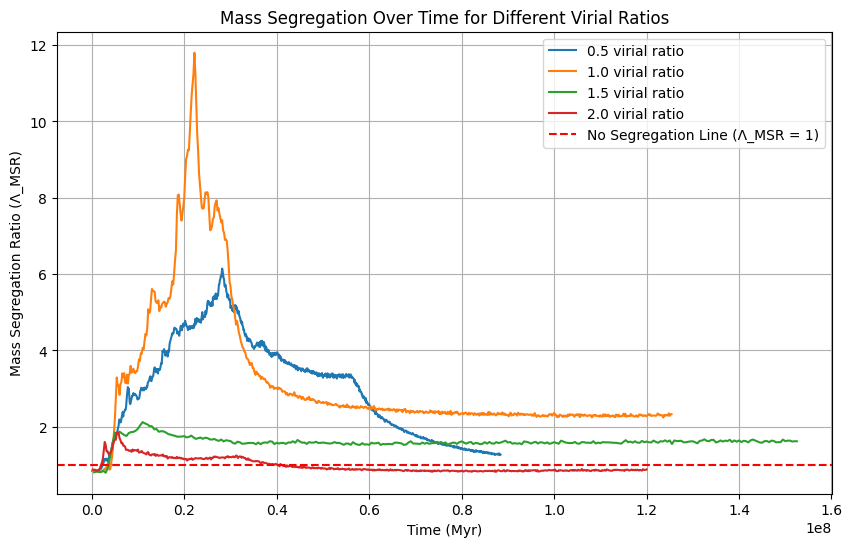

In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt
from nbd_utils_code import nbd_read
from scipy.spatial import cKDTree
from scipy.sparse.csgraph import minimum_spanning_tree

# Directories for the different virial ratios
simulation_directories = {
    '0.5 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir',
    '1.0 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_125Mev_1.0vir',
    '1.5 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_152Mev_1.5vir',
    '2.0 virial ratio': r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_52M_120Mev_2.0vir'
}

# Mass threshold to differentiate between 'massive' and 'low-mass' stars
mass_threshold = 0.6170320451257751  # Adjust as needed

# Number of random trials for the MST comparison
num_trials = 1000

def calculate_mst_length(positions):
    """Calculate the MST length for a given set of star positions."""
    tree = cKDTree(positions)
    distance_matrix = tree.sparse_distance_matrix(tree, np.inf)
    mst = minimum_spanning_tree(distance_matrix)
    mst_length = mst.sum()
    return mst_length

# To store the results for each simulation
results = {}

# Process each simulation directory
for label, snapshot_directory in simulation_directories.items():
    snapshot_files = sorted([f for f in os.listdir(snapshot_directory) if f.startswith('cluster')])

    # To store time and MST mass segregation ratios for this simulation
    times = []
    mass_segregation_ratios = []

    # Process each snapshot
    for snapshot_file in snapshot_files:
        filepath = os.path.join(snapshot_directory, snapshot_file)
        data = nbd_read(filepath)

        times.append(data.time)

        # Get star positions and masses
        positions = np.vstack([data.x, data.y, data.z]).T
        masses = data.mass

        # Select massive stars and their positions
        massive_star_positions = positions[masses > mass_threshold]

        # Compute MST length for massive stars
        mst_massive = calculate_mst_length(massive_star_positions)

        # Perform random trials for MST of random subsets of the same size
        all_mst_lengths = []
        num_massive_stars = len(massive_star_positions)
        
        for _ in range(num_trials):
            random_subset = positions[np.random.choice(len(positions), num_massive_stars, replace=False)]
            mst_random = calculate_mst_length(random_subset)
            all_mst_lengths.append(mst_random)

        # Compute the average MST length for random subsets
        mean_mst_random = np.mean(all_mst_lengths)

        # Mass Segregation Ratio (Λ_MSR)
        mass_segregation_ratio = mean_mst_random / mst_massive
        mass_segregation_ratios.append(mass_segregation_ratio)

    # Store the results for this simulation
    results[label] = {'times': times, 'mass_segregation_ratios': mass_segregation_ratios}

# Plot the results for all simulations
plt.figure(figsize=(10, 6))

for label, result in results.items():
    plt.plot(result['times'], result['mass_segregation_ratios'], label=label)

plt.xlabel('Time (Myr)')
plt.ylabel('Mass Segregation Ratio (Λ_MSR)')
plt.title('Mass Segregation Over Time for Different Virial Ratios')
plt.axhline(1, color='red', linestyle='--', label='No Segregation Line (Λ_MSR = 1)')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
len(all_masses)

61880

Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0000
N =  70
time 100000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0001
N =  70
time 200000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0002
N =  70
time 300000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0003
N =  70
time 400000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0004
N =  70
time 500000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0005
N =  

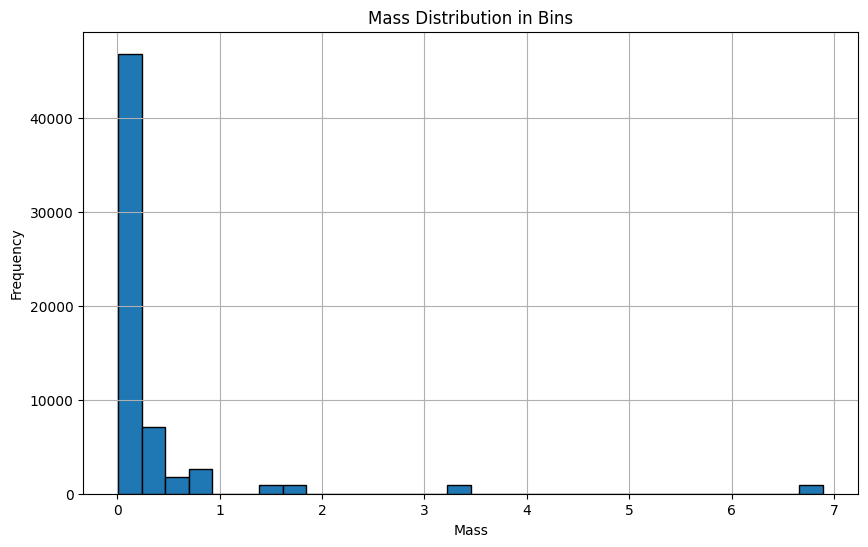

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
from nbd_utils_code import nbd_read  # Assuming nbd_read reads data with 'time', 'x', 'y', 'z', 'mass' attributes.

# Directory containing snapshot files
snapshot_directory = r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir'

# Get all snapshot files starting with 'cluster'
snapshot_files = sorted([f for f in os.listdir(snapshot_directory) if f.startswith('cluster')])

# To store masses from all snapshots
all_masses = []

# Loop through each snapshot file and extract data
for snapshot_file in snapshot_files:
    filepath = os.path.join(snapshot_directory, snapshot_file)
    data = nbd_read(filepath)

    # Append masses to the list
    all_masses.extend(data.mass)

# Convert mass list to a numpy array
all_masses = np.array(all_masses)

# Plotting the histogram of masses in bins
plt.figure(figsize=(10, 6))
plt.hist(all_masses, bins=30, edgecolor='black')  # Adjust 'bins' to control the number of bins
plt.title('Mass Distribution in Bins')
plt.xlabel('Mass')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
